In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from skimage import color
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

### Loading datas

In [2]:
# loading datas
from keras.datasets import cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
reshaped_all_datas = np.concatenate((x_train,x_test))

170508288/170498071 [==============================] - 3s 0us/step


### Plotting 10 random images

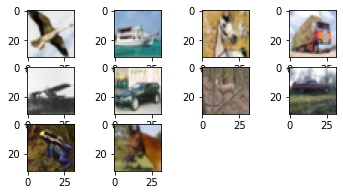

In [3]:
#plotting 10 random images from batch1
randomlist = random.sample(range(0, len(reshaped_all_datas)), 10)

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(reshaped_all_datas[randomlist[i]])
plt.show()

We have three types of datas: <br>
1- training <br>
2- validation <br>
3- test <br> <br>

Also we have three types of training datas <br>
1- Batch based : All data pints are applied, simultaneously <br>
2- Stochastic based: Data are shuffled and then data points are applied one by one <br>
3- Stochastic mini batch based: training data set are randomly divided to a certain number of subsets (minbatches); then at each time a min-batch is chosen and applied <br><br>

### Pre Processing

In [4]:
#converting RGB to Grayscale (takes too much time)
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

temp = []
for i in range(len(reshaped_all_datas)):
    img = reshaped_all_datas[i]
    ig = rgb2gray(img)
    ig = ig.reshape(1,32,32)
    temp.extend(ig.tolist())
reshaped_all_datas = np.array(temp)

In [5]:
#finding max and min in all datas
all_data_max = np.amax(reshaped_all_datas)
all_data_min = np.amin(reshaped_all_datas)
#normalizing datas
normalized_all_datas = reshaped_all_datas.astype('float32')/(all_data_max - all_data_min)

### MLP

##### Creating Dataset

In [6]:
Y = np.concatenate((y_train,y_test)) #target
X = normalized_all_datas #input
(x_train,x_valid,x_test) = X[:40000],X[40000:50000],X[50000:]
(y_train,y_valid,y_test) = Y[:40000],Y[40000:50000],Y[50000:]

#uncomment if rgb to grayscale used
x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_valid = x_valid.reshape(x_valid.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)

y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

#### Creating Model

In [91]:
from keras import layers
model = tf.keras.Sequential()

activation_func = 'relu'
# activation_func = tf.keras.activations.tanh
# activation_func = tf.keras.activations.sigmoid
# activation_func = tf.keras.activations.softmax

#CNN
model.add(layers.Conv2D(filters=35, kernel_size=2, padding='same', activation=activation_func, input_shape=(32,32,1))) 
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=50, kernel_size=2, padding='same', activation=activation_func))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.BatchNormalization())
model.add(layers.Flatten())

model.add(layers.Dense(400, activation=activation_func))
model.add(layers.Dropout(0.3))

# model.add(layers.Dense(64, activation=activation_func))
# model.add(layers.Dropout(0.3))

#last layer
model.add(layers.Dense(10, activation='softmax'))

#### Compiling the Model

In [92]:
loss_func = 'categorical_crossentropy'
# loss_func = 'mean_squared_error'
# loss_func = 'mean_absolute_error'

optimizer_func = 'adam'
# optimizer_func = tf.keras.optimizers.SGD(learning_rate = 0.1)
# optimizer_func = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['accuracy'])

#### Training Model

In [93]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data = (x_valid,y_valid), callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10))
# trainedModel = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data = (x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/50
79/79 [==============================] - 4s 45ms/step - loss: 1.8780 - accuracy: 0.3347 - val_loss: 2.2085 - val_accuracy: 0.4438
Epoch 2/50
79/79 [==============================] - 3s 41ms/step - loss: 1.3972 - accuracy: 0.5079 - val_loss: 2.1395 - val_accuracy: 0.4451
Epoch 3/50
79/79 [==============================] - 3s 41ms/step - loss: 1.2149 - accuracy: 0.5760 - val_loss: 2.0492 - val_accuracy: 0.4682
Epoch 4/50
79/79 [==============================] - 3s 41ms/step - loss: 1.1056 - accuracy: 0.6149 - val_loss: 1.9122 - val_accuracy: 0.5478
Epoch 5/50
79/79 [==============================] - 3s 41ms/step - loss: 1.0128 - accuracy: 0.6456 - val_loss: 1.6361 - val_accuracy: 0.6316
Epoch 6/50
79/79 [==============================] - 3s 41ms/step - loss: 0.9402 - accuracy: 0.6721 - val_loss: 1.3852 - val_accuracy: 0.6570
Epoch 7/50
79/79 [==============================] - 3s 41ms/step - loss: 0.8778 - accuracy: 0.6933 - val_loss: 1.1705 - val_accuracy: 0.6334
Epoch 8/50
79

In [94]:
print('Training Duration: ', end-start)

Training Duration:  0:01:13.029976


#### Evaluating the Model

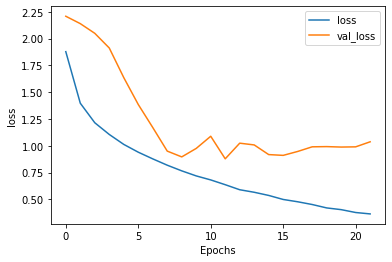

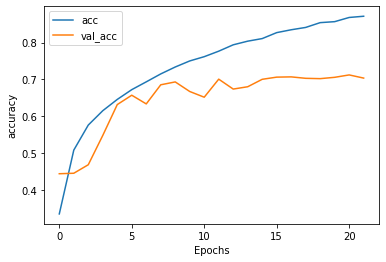

In [95]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [96]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.0861 - accuracy: 0.6934
1.0861446857452393
0.6934000253677368


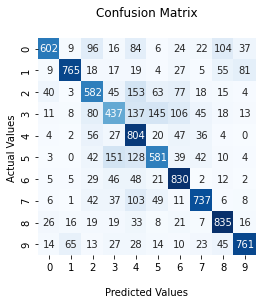

              precision    recall  f1-score   support

           0      0.836     0.602     0.700      1000
           1      0.875     0.765     0.816      1000
           2      0.596     0.582     0.589      1000
           3      0.532     0.437     0.480      1000
           4      0.523     0.804     0.634      1000
           5      0.638     0.581     0.608      1000
           6      0.696     0.830     0.757      1000
           7      0.787     0.737     0.761      1000
           8      0.756     0.835     0.794      1000
           9      0.822     0.761     0.790      1000

    accuracy                          0.693     10000
   macro avg      0.706     0.693     0.693     10000
weighted avg      0.706     0.693     0.693     10000



In [97]:
#confusion matrix
y_pred = model.predict(x_test)
y_pred_temp = []

for i in range(len(y_pred)):
  pred_index = np.argmax(y_pred[i])
  y_pred_temp.append(pred_index)
y_test_temp = []
for i in range(len(y_test)):
  test_index = np.argmax(y_test[i])
  y_test_temp.append(test_index)

matrix_confusion = metrics.confusion_matrix(y_test_temp, y_pred_temp)
mc = sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
mc.set_title('Confusion Matrix\n');
mc.set_xlabel('\nPredicted Values')
mc.set_ylabel('Actual Values ');
plt.show()
#calculating other metrics
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))